<a href="https://colab.research.google.com/github/MRAMIRE/Tesis_Modelo_Deep_Learning_USA/blob/master/Leer_CSV_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
id_raiz = '1Jdm2hUQFiqs0rbEjg_uT7YSPi4FCNcBr'

In [0]:
# Import PyDrive y librerias asociadas.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt

# Autenticacion y creacion del cliente PyDrive.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Identificar el id de los elementos dentro de la carpeta
listed1 = drive.ListFile({'q': "'%s' in parents" % id_raiz}).GetList()

for file in listed1:
  print ('title: %s, id: %s' % (file['title'], file['id']) )

title: Leer CSV train, id: 1DDiGWaAGMoVTMe8NaNkFh3R2mtSulEMZ
title: Leer imágenes-Tesis, id: 1_coPV3_uKX81TlQusH5NLV_LwNazjNpV
title: train_images, id: 1mA6g4TMJ8hBrn2ZlFWWyfUngqTsL8Blq
title: train_images, id: 1WasAS9CaBZ6WDVKxECK40z28Mo1GeGni
title: test_images, id: 1N2E6M1Lcm3RQzTjzeKDbi2jQIKj-QDSG
title: test_images, id: 1qjinBHLzQPTqQADBhm-Hm7KaN98f5ZA6
title: test_images, id: 1qb2Z_UBycu6-GsUPj9kq0eTAS-da99GP
title: test_images, id: 1d_77UlAyZ3-HvurfTMOTEDLTUvk2_Pu2
title: train.csv, id: 1W1Ye59rtwT6yJJUvMzVMXFnMFlx4fKDO
title: sample_submission.csv, id: 1tsqisESrbYSxc24J_OoMs_ky82CkmMlk


In [0]:
#Lectura archivo csv
train_downloaded = drive.CreateFile({'id' : '1W1Ye59rtwT6yJJUvMzVMXFnMFlx4fKDO'})
train_downloaded.GetContentFile('train.csv')

In [0]:
#Lectura archivo csv train
import pandas as pd
import numpy as np
df_train = pd.read_csv('train.csv')
print(df_train)

              Image_Label                                      EncodedPixels
0        0011165.jpg_Fish  264918 937 266318 937 267718 937 269118 937 27...
1      0011165.jpg_Flower  1355565 1002 1356965 1002 1358365 1002 1359765...
2      0011165.jpg_Gravel                                                NaN
3       0011165.jpg_Sugar                                                NaN
4        002be4f.jpg_Fish  233813 878 235213 878 236613 878 238010 881 23...
...                   ...                                                ...
22179   ffd6680.jpg_Sugar                                                NaN
22180    ffea4f4.jpg_Fish                                                NaN
22181  ffea4f4.jpg_Flower  1194860 675 1196260 675 1197660 675 1199060 67...
22182  ffea4f4.jpg_Gravel                                                NaN
22183   ffea4f4.jpg_Sugar                                                NaN

[22184 rows x 2 columns]


In [0]:
#Conteo de datos divididos por categoria label
df_train['Image_Label'].apply(lambda x: x.split('_')[1]).value_counts()

Fish      5546
Gravel    5546
Flower    5546
Sugar     5546
Name: Image_Label, dtype: int64

In [0]:
#Creación de las columnas label y im_id
df_train['label'] = df_train['Image_Label'].apply(lambda x: x.split('_')[1])
df_train['im_id'] = df_train['Image_Label'].apply(lambda x: x.split('_')[0])
df_train

,Image_Label,EncodedPixels,label,im_id
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,Fish,0011165.jpg
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower,0011165.jpg
2,0011165.jpg_Gravel,NaN,Gravel,0011165.jpg
3,0011165.jpg_Sugar,NaN,Sugar,0011165.jpg
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,Fish,002be4f.jpg
...,...,...,...,...
22179,ffd6680.jpg_Sugar,NaN,Sugar,ffd6680.jpg
22180,ffea4f4.jpg_Fish,NaN,Fish,ffea4f4.jpg
22181,ffea4f4.jpg_Flower,1194860 675 1196260 675 1197660 675 1199060 67...,Flower,ffea4f4.jpg
22182,ffea4f4.jpg_Gravel,NaN,Gravel,ffea4f4.jpg


In [0]:
df_train

,Image_Label,EncodedPixels,label,im_id
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,Fish,0011165.jpg
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower,0011165.jpg
2,0011165.jpg_Gravel,NaN,Gravel,0011165.jpg
3,0011165.jpg_Sugar,NaN,Sugar,0011165.jpg
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,Fish,002be4f.jpg
...,...,...,...,...
22179,ffd6680.jpg_Sugar,NaN,Sugar,ffd6680.jpg
22180,ffea4f4.jpg_Fish,NaN,Fish,ffea4f4.jpg
22181,ffea4f4.jpg_Flower,1194860 675 1196260 675 1197660 675 1199060 67...,Flower,ffea4f4.jpg
22182,ffea4f4.jpg_Gravel,NaN,Gravel,ffea4f4.jpg


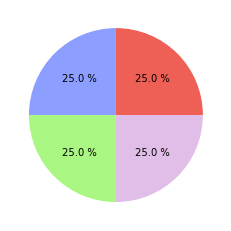

In [0]:
count = df_train['label'].value_counts()
colores = ["#EE6055","#8C9EFF","#AAF683","#E1BEE7"]
plt.pie(count, autopct="%0.1f %%", colors=colores)
plt.show()

In [0]:
#Conteo registros sin nulos, agrupados por número de label
df_train.loc[df_train['EncodedPixels'].isnull() == False, 'Image_Label'].apply(lambda x: x.split('_')[0]).value_counts().value_counts()

2    2372
3    1560
1    1348
4     266
Name: Image_Label, dtype: int64

In [0]:
#Creación de tabla en donde se eliminan registros nulos
a = df_train.dropna(0)
a

,Image_Label,EncodedPixels,label,im_id
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,Fish,0011165.jpg
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower,0011165.jpg
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,Fish,002be4f.jpg
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...,Flower,002be4f.jpg
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...,Sugar,002be4f.jpg
...,...,...,...,...
22171,ffd11b6.jpg_Sugar,1457936 458 1459336 458 1460736 458 1462136 45...,Sugar,ffd11b6.jpg
22175,ffd3dfb.jpg_Sugar,12891 428 14291 428 15691 428 17091 428 18491 ...,Sugar,ffd3dfb.jpg
22177,ffd6680.jpg_Flower,1509467 305 1509773 7 1509782 2 1510867 310 15...,Flower,ffd6680.jpg
22178,ffd6680.jpg_Gravel,39728 823 41128 823 42528 823 43928 823 45328 ...,Gravel,ffd6680.jpg


In [0]:
a['label'].value_counts()

Sugar     3751
Gravel    2939
Fish      2781
Flower    2365
Name: label, dtype: int64

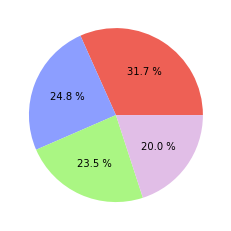

In [0]:
count2 = a['label'].value_counts()
count2
colores = ["#EE6055","#8C9EFF","#AAF683","#E1BEE7"]
plt.pie(count2, autopct="%0.1f %%", colors=colores)
plt.show()